\begin{array}{ccc}
\text{Luiza Castelar Rodrigues Pereira}\\
\text{Pos Graduacao Ciencia de Dados e Big Data}\\
\text{Materia: Machine Learning}\
\end{array}


**Exercício Prático III - Clusterização**

Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.
Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.

A base de dados se chama Atividade 6 - saúde.xlsx, e possui os atributos peso, colesterol e gênero. Peso e colesterol são atributos numéricos. Na variável gênero, 1 corresponde ao sexo masculino e 0 ao feminino.



**EXERCÍCIO**

Utilizando a K-means, realize a clusterização com k=2. Tente descrever os dois grupos gerados. Utilize as informações dos clusteres para tentar diferenciar os dois grupos de risco.

Vamos tentar encontrar 4 grupos distintos: alto risco possui colesterol e peso altos; baixo risco possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados. Investigue quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.


---



Importando bibliotecas:

In [34]:
import pandas as pd
from sklearn.cluster import KMeans  
from matplotlib import pyplot as plt
import numpy as np

Leitura dos dados:

In [35]:
link ='https://docs.google.com/spreadsheets/d/1ojgXmCtLpsIqs6pSQTyfewy5UlDy1ajI/export'
data = pd.read_excel(link)

Explorar dados:

*  O datasheet tem 547 linhas e 3 colunas
*  Sem nenhum valor nulo em nenhuma coluna
*  A coluna Gênero não tem nenhum valor errado além de 0 ou 1
*  Todas as colunas são numéricas inteiras
*  O menor registro de peso dessa população é 95 kgs, ou seja, não há individuos mais magros que 95 kgs 



In [36]:
data.shape

(547, 3)

In [37]:
data.head(5)

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [39]:
data['Genero'].unique()

array([1, 0])

In [49]:
data['Peso'].min()

95

Verificar visualmente como estão dispostos cada registro no plano:

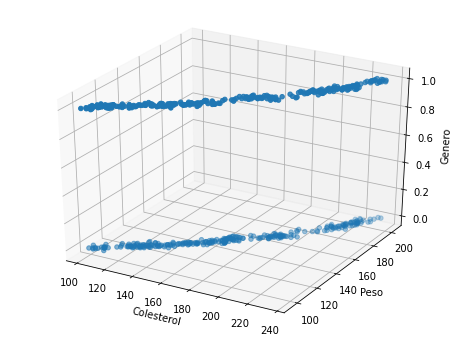

In [40]:
plt.figure(figsize = (8, 6))
axes = plt.axes(projection = '3d')
axes.scatter(data['Colesterol'], data['Peso'], data['Genero']) 

axes.set_xlabel('Colesterol')
axes.set_ylabel('Peso')
axes.set_zlabel('Genero')

plt.show() 

Cluster com k = 2 e random_state definido para sempre ter a mesma semente. Deixei o número de iterações default (300):

In [41]:
clusterizacao = KMeans(n_clusters=2, random_state=1).fit_predict(data)

clusterizacao[0 : 10]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

Agregando cada grupo ao registro correspondente:

In [42]:
data['Grupo'] = clusterizacao
data.head(7)

,Peso,Colesterol,Genero,Grupo
0,102,111,1,0
1,115,135,1,0
2,115,136,1,0
3,140,167,0,0
4,130,158,1,0
5,198,227,1,1
6,114,131,1,0


Representando visualmente os clusters:

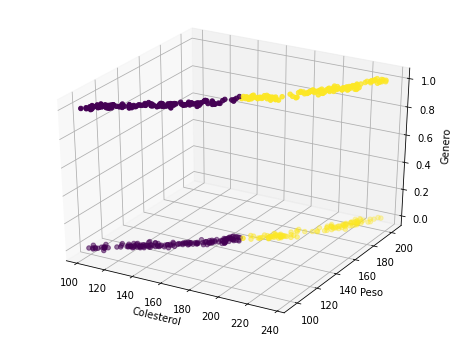

In [43]:
plt.figure(figsize = (8, 6))
axes = plt.axes(projection = '3d')
axes.scatter(data['Colesterol'], data['Peso'], data['Genero'], c= data['Grupo']) 

axes.set_xlabel('Colesterol')
axes.set_ylabel('Peso')
axes.set_zlabel('Genero')

plt.show() 

Vendo somente o gênero masculino, para melhor interpretação do resultado:

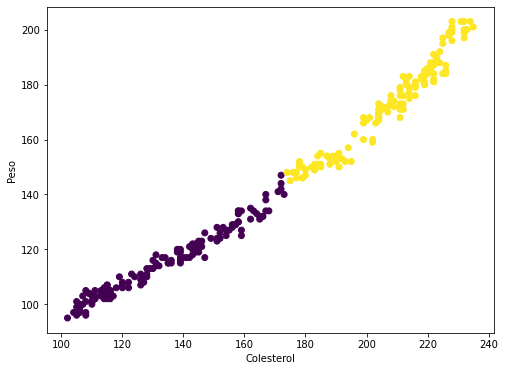

In [44]:
dataGeneroMasculino = data[data['Genero'] == 1]

plt.figure(figsize = (8, 6))
axes = plt.axes()
axes.scatter(dataGeneroMasculino['Colesterol'], dataGeneroMasculino['Peso'], c= dataGeneroMasculino['Grupo']) 

axes.set_xlabel('Colesterol')
axes.set_ylabel('Peso')

plt.show() 

O cluster dividiu em 2 grupos, sendo que: 
- No primeiro grupo, em roxo, as mulheres tem colesterol máximo de até 170 e peso máximo de até aproximadamente 155 kgs e homens tem colesterol máximo de 175 e peso de máximo de 145 kgs.

- No segundo grupo, em amarelo, as mulheres tem colesterol minimo de 170 e máximo de 230 e peso entre 155 kgs até um pouco acima de 200 kgs, enquanto os homens tem colesterol de 175 até aproxidamente 235 e peso de 145 kgs até um pouco acima de 200 kgs.







De acordo com o [IMEPE](https://institutoimepe.com.br) (Instituto Médico de Pediatria e Especialidades), o [Colesterol Total Desejável](https://institutoimepe.com.br/images/zaloom/blog/instituto-imepe_exames_manometria-esofagica_phmetria_teste-do-suor_fibrose-cistica_manometria-anorretal_pediatria-e-gastroenterologia-brasilia-df_blog-artigo-02-1.jpg) é abaixo de 170, o aceitavel é de 170 a 199 e o alto é acima de 200. 

Ou seja, o algoritmo detectou corretamente o nivel máximo de colesterol para ser o ideal, agrupando os individuos que possuem esse nivel sob a cor roxa, tanto para mulher como para homem. 

O algoritmo considerou o nivel aceitavel e alto como sendo um só, já que queriamos somente 2 grupos e não três.


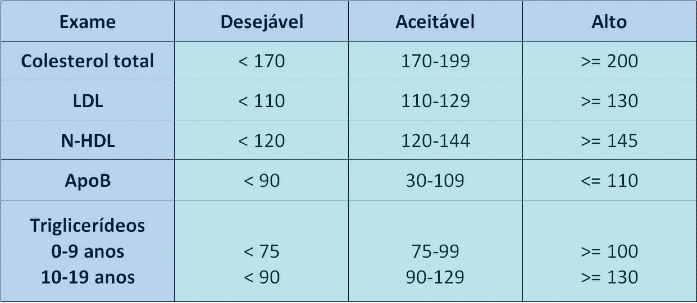

Clusterizando com k = 4, para 4 grupos de cluster, com mesmos parametros de random_state e número de iterações default:



In [45]:
clusterizacaoQuatroClusters = KMeans(n_clusters=4, random_state=1).fit_predict(data)
clusterizacaoQuatroClusters[0 : 10]

array([3, 3, 3, 1, 1, 0, 3, 2, 0, 0], dtype=int32)

Juntando os grupos no dataset:

In [46]:
data['GrupoQuatroClusters'] = clusterizacaoQuatroClusters
data.head(5)

,Peso,Colesterol,Genero,Grupo,GrupoQuatroClusters
0,102,111,1,0,3
1,115,135,1,0,3
2,115,136,1,0,3
3,140,167,0,0,1
4,130,158,1,0,1


Visualizando o novo gráfico:

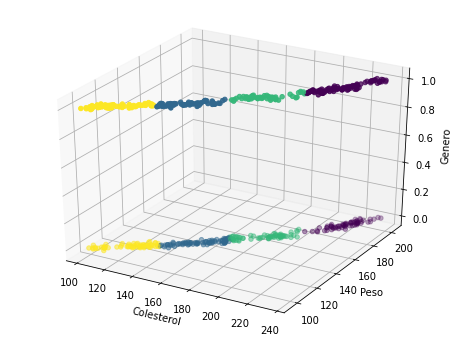

In [47]:
plt.figure(figsize = (8, 6))
axes = plt.axes(projection = '3d')
axes.scatter(data['Colesterol'], data['Peso'], data['Genero'], c= data['GrupoQuatroClusters']) 

axes.set_xlabel('Colesterol')
axes.set_ylabel('Peso')
axes.set_zlabel('Genero')

plt.show() 

Vendo mais detalhadamente o grupo masculino:

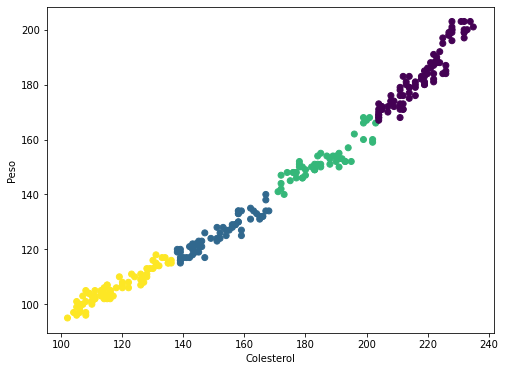

In [48]:
dataGeneroMasculino = data[data['Genero'] == 1]

plt.figure(figsize = (8, 6))
axes = plt.axes()
axes.scatter(dataGeneroMasculino['Colesterol'], dataGeneroMasculino['Peso'], c= dataGeneroMasculino['GrupoQuatroClusters']) 

axes.set_xlabel('Colesterol')
axes.set_ylabel('Peso')

plt.show() 

Considerando que o peso minimo de toda a população é 95kgs:

*   Baixo risco (colesterol e peso baixos) = representado pelo grupo amarelo. Para mulheres, o colesterol varia entre aprox. 100 até 135, com peso entre minimo de 100, máximo de 125.
Já para os homens, o colesterol vai de 100 a 140 e peso entre 95 kgs até 120 kgs.


*   Alto risco (colesterol e peso altos) = representado pelo grupo roxo. Para mulheres, o colesterol vai de 200 até quase 240, e peso entre 180 kgs até um pouco mais de 200 kgs.
Já para homens, colesterol minimo de 205 até 240 com peso variando entre 170 à um pouco mais de 200.

*   Risco moderado (peso ou colesterol altos) = representados pelos grupos azul e verde. Para mulheres, colesterol indo de apróx. 135 à 200, com peso entre 125 kgs até quase 180 kgs.
Já para homens, colesterol entre 140 à 200, com peso entre 120 kgs até aprox. 170 kgs.

